- 다양한 곱셈 시나리오를 통해, right sm todense latency 와 only sm * dm multiply latency 측정
- 모든 측정 결과들에 대해, [ right sm todense latency / only sm * dm multiply latency ] 계산
- 전체 곱셈 시나리오 중, 20%의 시나리오에서 sm todense latency가 실제 sm * dm multiply latency에 비해  큰 비율을 차지하는 것을 확인
    - 해당 결과는 matrix size, density 등의 다양한 원인들이 존재하기 때문에, 정확한 원인을 설명하긴 어려움

### CDF (cumulative distribution function)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/dataset/3.spmm-dataset/dataset/spmm-original/sp-smdm-todense-ratio-2000.csv")

### sparse to dense overhead 1번째 figure

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt 

# plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
# fig = plt.figure(figsize=(15,7))

# # x 축으로 사용할 ratio
# ratio = df['sp_todense_ratio']

# # 배열의 모든 값을 1/1998 로 초기화
# y = np.zeros(len(ratio)) + (1 / len(ratio))
# # 누적 비율 생성
# cdf = np.cumsum(y)

# plt.grid(True)

# plt.xticks([0,2,4,6,8])

# plt.xlabel("ratio")
# plt.ylabel("Cumulative distribution", labelpad=20)

# plt.plot(ratio,cdf,linewidth=3, color = "royalblue")
# fig.savefig('./sparse-to-dense-overhead-v2-first.png')
# plt.show()

### sparse to dense overhead 2번째 figure

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt 

# plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
# fig = plt.figure(figsize=(15,7))

# # 상위 20% ratio 뽑기
# ratio_top_20 = ratio[int(len(ratio)*0.8):]
# cdf_top_20 = cdf[int(len(ratio)*0.8):]

# plt.grid(True)

# plt.xlabel("ratio")
# plt.ylabel("Cumulative distribution", labelpad=20)

# plt.plot(ratio_top_20,cdf_top_20,linewidth=3, color = "royalblue")
# fig.savefig('./sparse-to-dense-overhead-v2-second.png')
# plt.show()

### sparse to dense overhead 2번째 figure, 일부 데이터가 전체 데이터인 것 처럼 수정

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt 

# plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
# fig = plt.figure(figsize=(15,7))

# # 상위 20% ratio 뽑기
# ratio_top_20 = ratio[int(len(ratio)*0.8):]

# # 배열의 모든 값을 초기화
# y = np.zeros(len(ratio_top_20)) + (1 / len(ratio_top_20))

# # 누적 비율 생성
# cdf_top_20 = np.cumsum(y)

# plt.grid(True)

# plt.xlabel("ratio")
# plt.ylabel("Cumulative distribution", labelpad=20)

# plt.plot(ratio_top_20,cdf_top_20,linewidth=3, color = "royalblue")
# fig.savefig('./sparse-to-dense-overhead-v2-second.png')
# plt.show()

### 그래프 안에 그래프 그리기

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid.inset_locator import inset_axes

# # 전체 ratio
# ratio = df['sp_todense_ratio']

# # 배열의 모든 값 초기화
# y = np.zeros(len(ratio)) + (1 / len(ratio))
# # 누적 비율 생성
# cdf = np.cumsum(y)

# # 상위 20% ratio
# ratio_top_20 = ratio[int(len(ratio)*0.8):]

# # 배열의 모든 값 초기화
# y = np.zeros(len(ratio_top_20)) + (1 / len(ratio_top_20))
# # 누적 비율 생성
# cdf_top_20 = np.cumsum(y)

# ##########################################################################################

# fontsize = 40

# plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기

# fig = plt.figure(figsize=(12,8)) # figure 크기 설정

# # main subplot 추가
# ax = fig.add_subplot(111) 

# ax.grid(True)
# ax.set_xlabel("ratio", labelpad=20)
# ax.set_ylabel("Cumulative distribution", labelpad=30, fontsize=fontsize*0.9)
# ax.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1.0])

# ax.plot(ratio_top_20,cdf_top_20, linewidth=3, color = "royalblue")

# # main subplot 에 insert subplot 추가
# ax_insert = inset_axes(ax, width="40%", height=1.8, loc=4, borderpad=2)

# ax_insert.tick_params(labelsize=20)
# ax_insert.set_xticks([0,2,4,6,8])
# ax_insert.set_yticks([0,0.5,1.0])

# # insert subplot 내부 표현
# ax_insert.plot(ratio,cdf, linewidth=3, color = "royalblue")

# fig.tight_layout()
# fig.savefig('./sparse-to-dense-overhead-v2-total.png')

# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


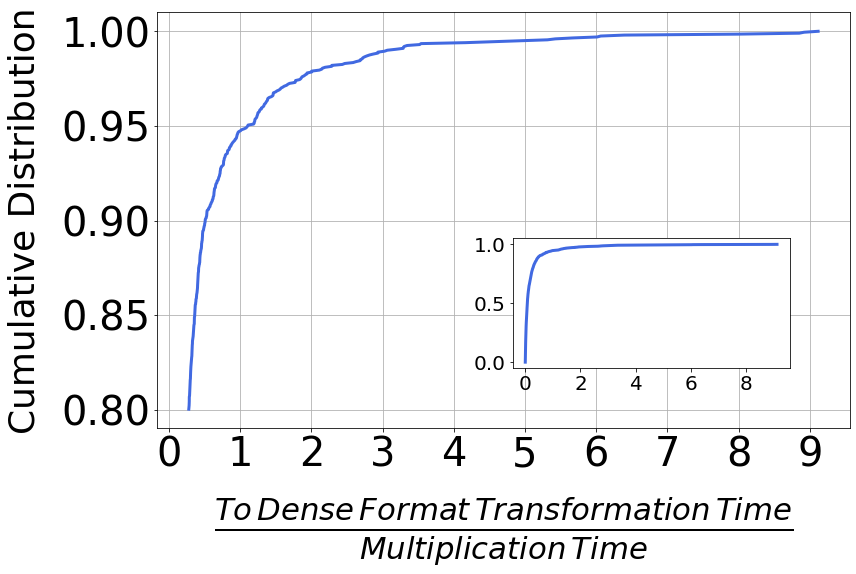

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes

# 전체 ratio
ratio = df['right_sm_todense/only_multiply']

# 배열의 모든 값 초기화
y = np.zeros(len(ratio)) + (1 / len(ratio))
# 누적 비율 생성
cdf = np.cumsum(y)

# 상위 20% ratio
ratio_top_20 = ratio[int(len(ratio)*0.8):]
cdf_top_20 = cdf[int(len(ratio)*0.8):]

# # 배열의 모든 값 초기화
# y = np.zeros(len(ratio_top_20)) + (1 / len(ratio_top_20))
# # 누적 비율 생성
# cdf_top_20 = np.cumsum(y)

##########################################################################################

fontsize = 40

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기

fig = plt.figure(figsize=(12,8)) # figure 크기 설정

# main subplot 추가
ax = fig.add_subplot(111) 

ax.grid(True)
ax.set_xlabel(r'$\frac{To\/Dense\/Format\/Transformation\/Time}{Multiplication\/Time}$', labelpad=20, fontsize=fontsize*1.1) 
ax.set_ylabel("Cumulative Distribution", labelpad=20, fontsize=fontsize*0.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])

ax.plot(ratio_top_20,cdf_top_20, linewidth=3, color = "royalblue")

# main subplot 에 insert subplot 추가
ax_insert = inset_axes(ax, width="40%", height=1.8, loc=4, borderpad=6)

ax_insert.tick_params(labelsize=20)
ax_insert.set_xticks([0,2,4,6,8])
ax_insert.set_yticks([0,0.5,1.0])

# insert subplot 내부 표현
ax_insert.plot(ratio,cdf, linewidth=3, color = "royalblue")

fig.tight_layout()
fig.savefig('../pdf/sparse-to-dense-overhead.pdf')

plt.show()

In [8]:
ratio_top_20 = ratio[int(len(ratio)*0.8)]
ratio_top_20

0.278736895

In [9]:
ratio_top_20 = ratio[int(len(ratio)*0.85)]
ratio_top_20

0.36300932399999997

In [10]:
ratio_top_20 = ratio[int(len(ratio)*0.9)]
ratio_top_20

0.50974623

In [11]:
ratio_top_20 = ratio[int(len(ratio)*0.95)]
ratio_top_20

1.111524676

In [12]:
ratio_top_20 = ratio[1997]
ratio_top_20

9.117073171